# Wrangling the Billboard Top 100

Consider the data in billboard.csv containing every song to appear on the weekly Billboard Top 100 chart since 1958, up through the middle of 2021. Each row of this data corresponds to a single song in a single week. For our purposes, the relevant columns here are:
- performer: who performed the song
- song: the title of the song
- year: year (1958 to 2021)
- week: chart week of that year (1, 2, etc)
- week_position: what position that song occupied that week on the Billboard top 100 chart.

Use your skills in data wrangling and plotting to answer the following three questions.

Part A: Make a table of the top 10 most popular songs since 1958, as measured by the total number of weeks that a song spent on the Billboard Top 100. Note that these data end in week 22 of 2021, so the most popular songs of 2021 will not have up-to-the-minute data; please send our apologies to The Weeknd.

Your table should have 10 rows and 3 columns: performer, song, and count, where count represents the number of weeks that song appeared in the Billboard Top 100. Make sure the entries are sorted in descending order of the count variable, so that the more popular songs appear at the top of the table. Give your table a short caption describing what is shown in the table.

(Note: you’ll want to use both performer and song in any group_by operations, to account for the fact that multiple unique songs can share the same title.)

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

In [2]:
# Import data 
df = pd.read_csv('billboard.csv').drop_duplicates()

# Drop unnamed column and select only necessary columns, drop duplicates as a standard
df.drop(columns=['Unnamed: 0'], inplace = True)
df = df[['performer', 'song', 'year', 'week', 'week_position']].drop_duplicates()

In [3]:
# Get top 10 songs that have appeared in most weeks
week_count = df.groupby(by=['performer', 'song']).agg(count = ('week', 'count'))
week_count.sort_values(by='count', ascending = False).head(10)

## caption??

,,count
performer,song,
Imagine Dragons,Radioactive,87
AWOLNATION,Sail,79
The Weeknd,Blinding Lights,76
Jason Mraz,I'm Yours,76
LeAnn Rimes,How Do I Live,69
OneRepublic,Counting Stars,68
LMFAO Featuring Lauren Bennett & GoonRock,Party Rock Anthem,68
Jewel,Foolish Games/You Were Meant For Me,65
Adele,Rolling In The Deep,65


Part B: Is the “musical diversity” of the Billboard Top 100 changing over time? Let’s find out. We’ll measure the musical diversity of given year as the number of unique songs that appeared in the Billboard Top 100 that year. Make a line graph that plots this measure of musical diversity over the years. The x axis should show the year, while the y axis should show the number of unique songs appearing at any position on the Billboard Top 100 chart in any week that year. For this part, please filter the data set so that it excludes the years 1958 and 2021, since we do not have complete data on either of those years. Give the figure an informative caption in which you explain what is shown in the figure and comment on any interesting trends you see.

There are number of ways to accomplish the data wrangling here. For example, you could use two distinct sets of data-wrangling steps. The first set of steps would get you a table that counts the number of times that a given song appears on the Top 100 in a given year. The second set of steps operate on the result of the first set of steps; it would count the number of unique songs that appeared on the Top 100 in each year, irrespective of how many times it had appeared.

Text(0.5, 1.0, 'Musical diversity over years')

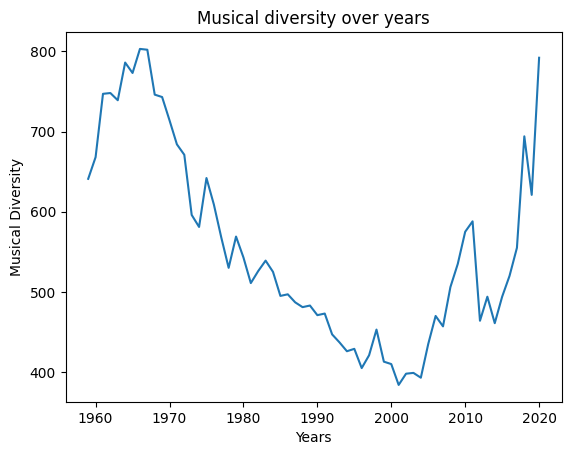

In [4]:
df_filtered = df[(df['year'] != 1958) & (df['year'] != 2021)]
plot(df_filtered.groupby(by=['year']).agg(musical_diversity = ('song', 'nunique')))
xlabel('Years')
ylabel('Musical Diversity')
title('Musical diversity over years')

Part C: Let’s define a “ten-week hit” as a single song that appeared on the Billboard Top 100 for at least ten weeks. There are 19 artists in U.S. musical history since 1958 who have had at least 30 songs that were “ten-week hits.” Make a bar plot for these 19 artists, showing how many ten-week hits each one had in their musical career. Give the plot an informative caption in which you explain what is shown.

Notes:

- You might find this easier to accomplish in two distinct sets of data wrangling steps.
- Make sure that the individuals names of the artists are readable in your plot, and that they’re not all jumbled together. If you find that your plot isn’t readable with vertical bars, you can add a coord_flip() layer to your plot to make the bars (and labels) run horizontally instead.
- By default a bar plot will order the artists in alphabetical order. This is acceptable to turn in. But if you’d like to order them according to some other variable, you can use the fct_reorder function, described in this blog post. This is optional.

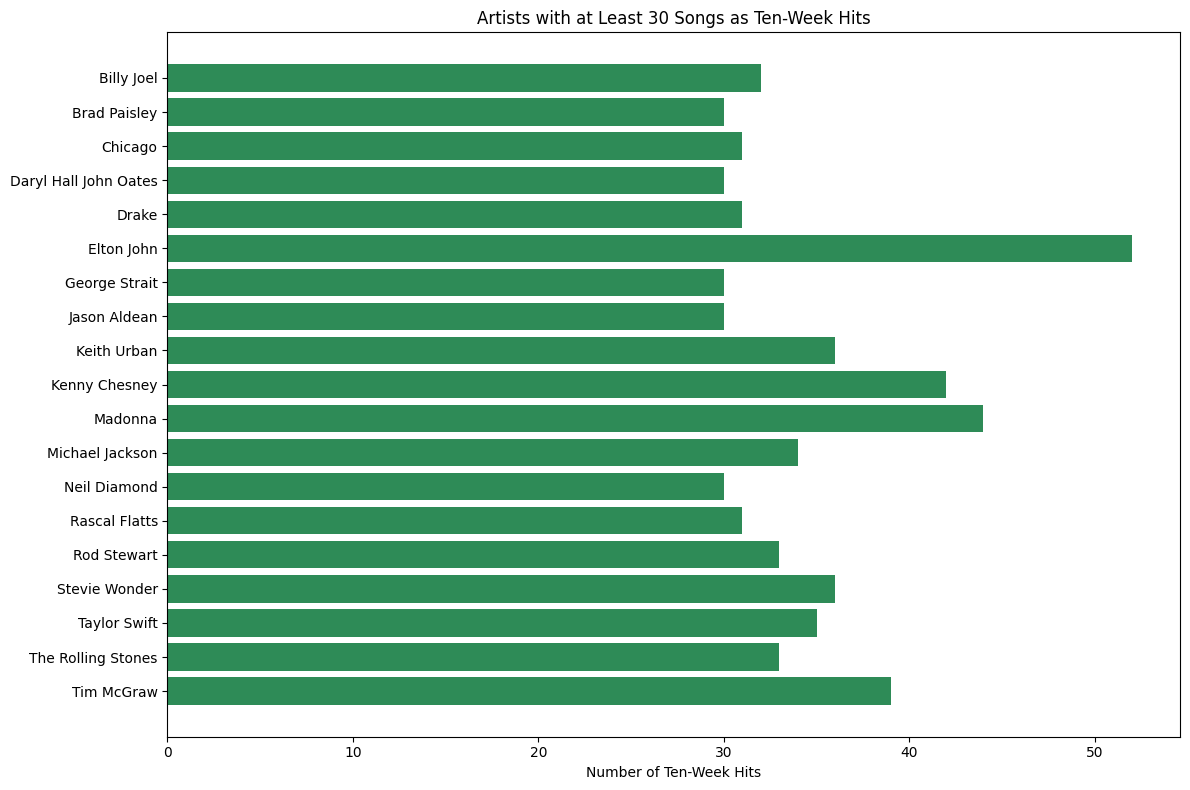

In [5]:
ten_week_hit = week_count[week_count['count'] >= 10].reset_index()
performer_hit = ten_week_hit.groupby('performer').agg(song_count = ('song', 'nunique')).reset_index()
performer_hit = performer_hit[performer_hit['song_count']>=30]

plt.figure(figsize=(12, 8))
plt.barh(performer_hit['performer'], performer_hit['song_count'], color='seagreen')
plt.xlabel('Number of Ten-Week Hits')
plt.title('Artists with at Least 30 Songs as Ten-Week Hits')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.tight_layout()
plt.show()

# Visual story telling part 1: green buildings

## The case

Over the past decade, both investors and the general public have paid increasingly close attention to the benefits of environmentally conscious buildings. There are both ethical and economic forces at work here. In commercial real estate, issues of eco-friendliness are intimately tied up with ordinary decisions about how to allocate capital. In this context, the decision to invest in eco-friendly buildings could pay off in at least four ways.

- Every building has the obvious list of recurring costs: water, climate control, lighting, waste disposal, and so forth. Almost by definition, these costs are lower in green buildings.
- Green buildings are often associated with better indoor environments—the kind that are full of sunlight, natural materials, and various other humane touches. Such environments, in turn, might result in higher employee productivity and lower absenteeism, and might therefore be more coveted by potential tenants. The financial impact of this factor, however, is rather hard to quantify ex ante; you cannot simply ask an engineer in the same way that you could ask a question such as, “How much are these solar panels likely to save on the power bill?”
- Green buildings make for good PR. They send a signal about social responsibility and ecological awareness, and might therefore command a premium from potential tenants who want their customers to associate them with these values. It is widely believed that a good corporate image may enable a firm to charge premium prices, to hire better talent, and to attract socially conscious investors.
- Finally, sustainable buildings might have longer economically valuable lives. For one thing, they are expected to last longer, in a direct physical sense. (One of the core concepts of the green-building movement is “life-cycle analysis,” which accounts for the high front-end environmental impact of acquiring materials and constructing a new building in the first place.) Moreover, green buildings may also be less susceptible to market risk—in particular, the risk that energy prices will spike, driving away tenants into the arms of bolder, greener investors.
  
Of course, much of this is mere conjecture. At the end of the day, tenants may or may not be willing to pay a premium for rental space in green buildings. We can only find out by carefully examining data on the commercial real-estate market.

The file greenbuildings.csv contains data on 7,894 commercial rental properties from across the United States. Of these, 685 properties have been awarded either LEED or EnergyStar certification as a green building. You can easily find out more about these rating systems on the web, e.g. at www.usgbc.org. The basic idea is that a commercial property can receive a green certification if its energy efficiency, carbon footprint, site selection, and building materials meet certain environmental benchmarks, as certified by outside engineers.

A group of real estate economists constructed the data in the following way. Of the 1,360 green-certified buildings listed as of December 2007 on the LEED or EnergyStar websites, current information about building characteristics and monthly rents were available for 685 of them. In order to provide a control population, each of these 685 buildings was matched to a cluster of nearby commercial buildings in the CoStar database. Each small cluster contains one green-certified building, and all non-rated buildings within a quarter-mile radius of the certified building. On average, each of the 685 clusters contains roughly 12 buildings, for a total of 7,894 data points.

The columns of the data set are coded as follows:

- CS.PropertyID: the building’s unique identifier in the CoStar database.
- cluster: an identifier for the building cluster, with each cluster containing one green-certified building and at least one other non-green-certified building within a quarter-mile radius of the cluster center.
- size: the total square footage of available rental space in the building.
- empl.gr: the year-on-year growth rate in employment in the building’s geographic region.
- Rent: the rent charged to tenants in the building, in dollars per square foot per calendar year.
- leasing.rate: a measure of occupancy; the fraction of the building’s available space currently under lease.
- stories: the height of the building in stories.
- age: the age of the building in years.
- renovated: whether the building has undergone substantial renovations during its lifetime.
- class.a, class.b: indicators for two classes of building quality (the third is Class C). These are relative classifications within a specific market. Class A buildings are generally the highest-quality properties in a given market. Class B buildings are a notch down, but still of reasonable quality. Class C buildings are the least desirable properties in a given market.
- green.rating: an indicator for whether the building is either LEED- or EnergyStar-certified.
- LEED, Energystar: indicators for the two specific kinds of green certifications.
- net: an indicator as to whether the rent is quoted on a “net contract” basis. Tenants with net-rental contracts pay their own utility costs, which are otherwise included in the quoted rental price.
- amenities: an indicator of whether at least one of the following amenities is available on-site: bank, convenience store, dry cleaner, restaurant, retail shops, fitness center.
- cd.total.07: number of cooling degree days in the building’s region in 2007. A degree day is a measure of demand for energy; higher values mean greater demand. Cooling degree days are measured relative to a baseline outdoor temperature, below which a building needs no cooling.
- hd.total07: number of heating degree days in the building’s region in 2007. Heating degree days are also measured relative to a baseline outdoor temperature, above which a building needs no heating.
- total.dd.07: the total number of degree days (either heating or cooling) in the building’s region in 2007.
- Precipitation: annual precipitation in inches in the building’s geographic region.
- Gas.Costs: a measure of how much natural gas costs in the building’s geographic region.
- Electricity.Costs: a measure of how much electricity costs in the building’s geographic region.
- cluster.rent: a measure of average rent per square-foot per calendar year in the building’s local market.

## The goal
An Austin real-estate developer is interested in the possible economic impact of “going green” in her latest project: a new 15-story mixed-use building on East Cesar Chavez, just across I-35 from downtown. Will investing in a green building be worth it, from an economic perspective? The baseline construction costs are $100 million, with a 5% expected premium for green certification.

The developer has had someone on her staff, who’s been described to her as a “total Excel guru from his undergrad statistics course,” run some numbers on this data set and make a preliminary recommendation. Here’s how this person described his process.

I began by cleaning the data a little bit. In particular, I noticed that a handful of the buildings in the data set had very low occupancy rates (less than 10% of available space occupied). I decided to remove these buildings from consideration, on the theory that these buildings might have something weird going on with them, and could potentially distort the analysis. Once I scrubbed these low-occupancy buildings from the data set, I looked at the green buildings and non-green buildings separately. The median market rent in the non-green buildings was USD 25 per square foot per year, while the median market rent in the green buildings was USD27.60 per square foot per year: about USD 2.60 more per square foot. (I used the median rather than the mean, because there were still some outliers in the data, and the median is a lot more robust to outliers.) Because our building would be 250,000 square feet, this would translate into an additional USD 250000 x 2.6 = USD 650000 of extra revenue per year if we build the green building.

Our expected baseline construction costs are USD 100 million, with a 5% expected premium for green certification. Thus we should expect to spend an extra USD 5 million on the green building. Based on the extra revenue we would make, we would recuperate these costs in USD 5000000/650000 = 7.7 years. Even if our occupancy rate were only 90%, we would still recuperate the costs in a little over 8 years. Thus from year 9 onwards, we would be making an extra USD 650,000 per year in profit. Since the building will be earning rents for 30 years or more, it seems like a good financial move to build the green building.

The developer listened to this recommendation, understood the analysis, and still felt unconvinced. She has therefore asked you to revisit the report, so that she can get a second opinion.

Do you agree with the conclusions of her on-staff stats guru? If so, point to evidence supporting his case. If not, explain specifically where and why the analysis goes wrong, and how it can be improved. Do you see the possibility of confounding variables for the relationship between rent and green status? If so, provide evidence for confounding, and see if you can also make a picture that visually shows how we might “adjust” for such a confounder. Tell your story in pictures, with appropriate introductory and supporting text.

Note: this is intended as an exercise in visual and numerical story-telling. Your approach should rely on pictures and/or tables, not a regression model. Tell a story understandable to a non-technical audience. Keep it concise.

In [6]:
gb = pd.read_csv('greenbuildings.csv')
gb.describe()

,CS_PropertyID,cluster,size,empl_gr,Rent,leasing_rate,stories,age,renovated,class_a,...,green_rating,net,amenities,cd_total_07,hd_total07,total_dd_07,Precipitation,Gas_Costs,Electricity_Costs,cluster_rent
count,7.894000e+03,7894.000000,7.894000e+03,7820.000000,7894.000000,7894.000000,7894.000000,7894.000000,7894.000000,7894.000000,...,7894.000000,7894.000000,7894.000000,7894.000000,7894.000000,7894.000000,7894.000000,7894.000000,7894.000000,7894.000000
mean,4.530025e+05,588.615024,2.346377e+05,3.206720,28.418569,82.606371,13.584495,47.243983,0.379529,0.399924,...,0.086775,0.034710,0.526602,1229.354193,3432.042311,4661.396504,31.081312,0.011336,0.030959,27.497285
std,7.434053e+05,399.907509,2.975334e+05,8.162989,15.075483,21.380315,12.287083,32.194393,0.485300,0.489913,...,0.281523,0.183056,0.499323,1104.588925,1976.937255,1984.326881,11.575219,0.002406,0.008534,10.598952
min,1.000000e+00,1.000000,1.624000e+03,-24.950000,2.980000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,39.000000,0.000000,2103.000000,10.460000,0.009487,0.017800,9.000000
25%,1.574520e+05,272.000000,5.089125e+04,1.740000,19.500000,77.850000,4.000000,23.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,684.000000,1419.000000,2869.000000,22.710000,0.010296,0.023300,20.000000
50%,3.132530e+05,476.000000,1.288380e+05,1.970000,25.160000,89.530000,10.000000,34.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,966.000000,2739.000000,4979.000000,23.160000,0.010296,0.032737,25.145000
75%,4.411885e+05,1044.000000,2.942120e+05,2.380000,34.180000,96.440000,19.000000,79.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,1620.000000,4796.000000,6413.000000,43.890000,0.011816,0.037808,34.000000
max,6.208103e+06,1230.000000,3.781045e+06,67.780000,250.000000,100.000000,110.000000,187.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,5240.000000,7200.000000,8244.000000,58.020000,0.028914,0.062800,71.440000


In [7]:
# Filter for 15 storied buildings
gb[gb['stories']==15]['Rent'].median() # 25

24.47

In [8]:
gb['cluster'].nunique() # should be 685?

693

In [9]:
# We should look at all the variables that might predict our target variable 'Rent'

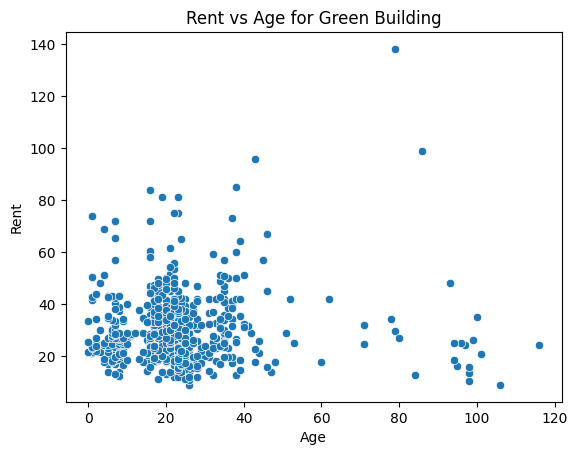

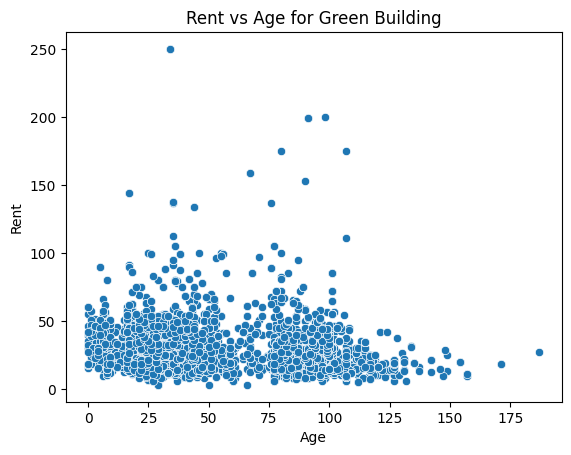

In [10]:
# Rent vs Age of Green buildings
sns.scatterplot(x='age', y='Rent', data=gb[gb['green_rating']==1])
plt.title('Rent vs Age for Green Building')
plt.xlabel('Age')
plt.ylabel('Rent')
plt.show()

sns.scatterplot(x='age', y='Rent', data=gb[gb['green_rating']==0])
plt.title('Rent vs Age for Green Building')
plt.xlabel('Age')
plt.ylabel('Rent')
plt.show()

# The green buildings look relatively new. The Age of building doesn't seem to be affecting the rent here
# we should compare green and non-green buildings of similar ages.

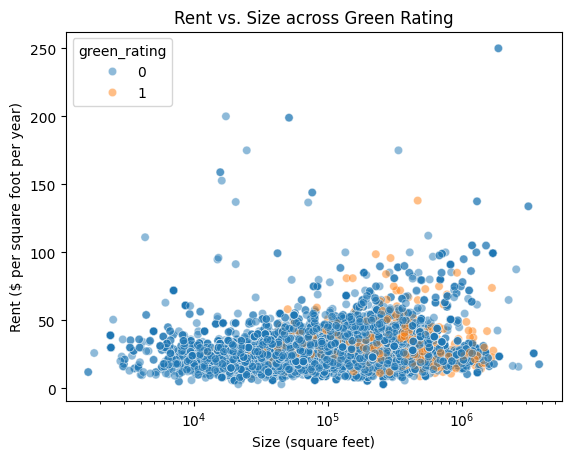

In [11]:
# Size Vs Rent

sns.scatterplot(x='size', y='Rent', hue='green_rating', data=gb, alpha=0.5)
plt.title('Rent vs. Size across Green Rating')
plt.xlabel('Size (square feet)')
plt.ylabel('Rent ($ per square foot per year)')
plt.xscale('log')
plt.show()

# We can see a slightly upward trend here regardless of the green rating
# we should compare buildings of similar sizes

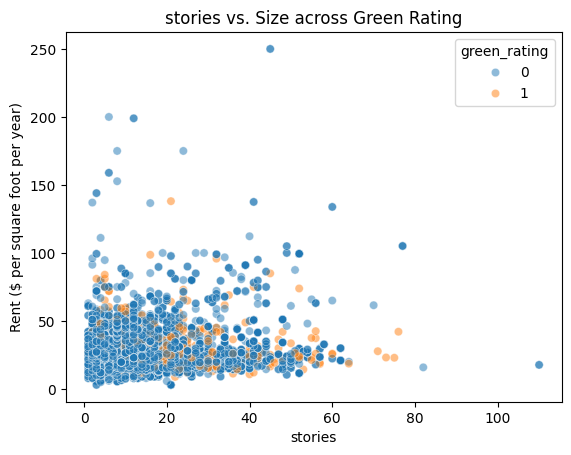

In [12]:
# Stories Vs Rent
sns.scatterplot(x='stories', y='Rent', hue='green_rating', data=gb, alpha=0.5)
plt.title('stories vs. Size across Green Rating')
plt.xlabel('stories')
plt.ylabel('Rent ($ per square foot per year)')
plt.show()

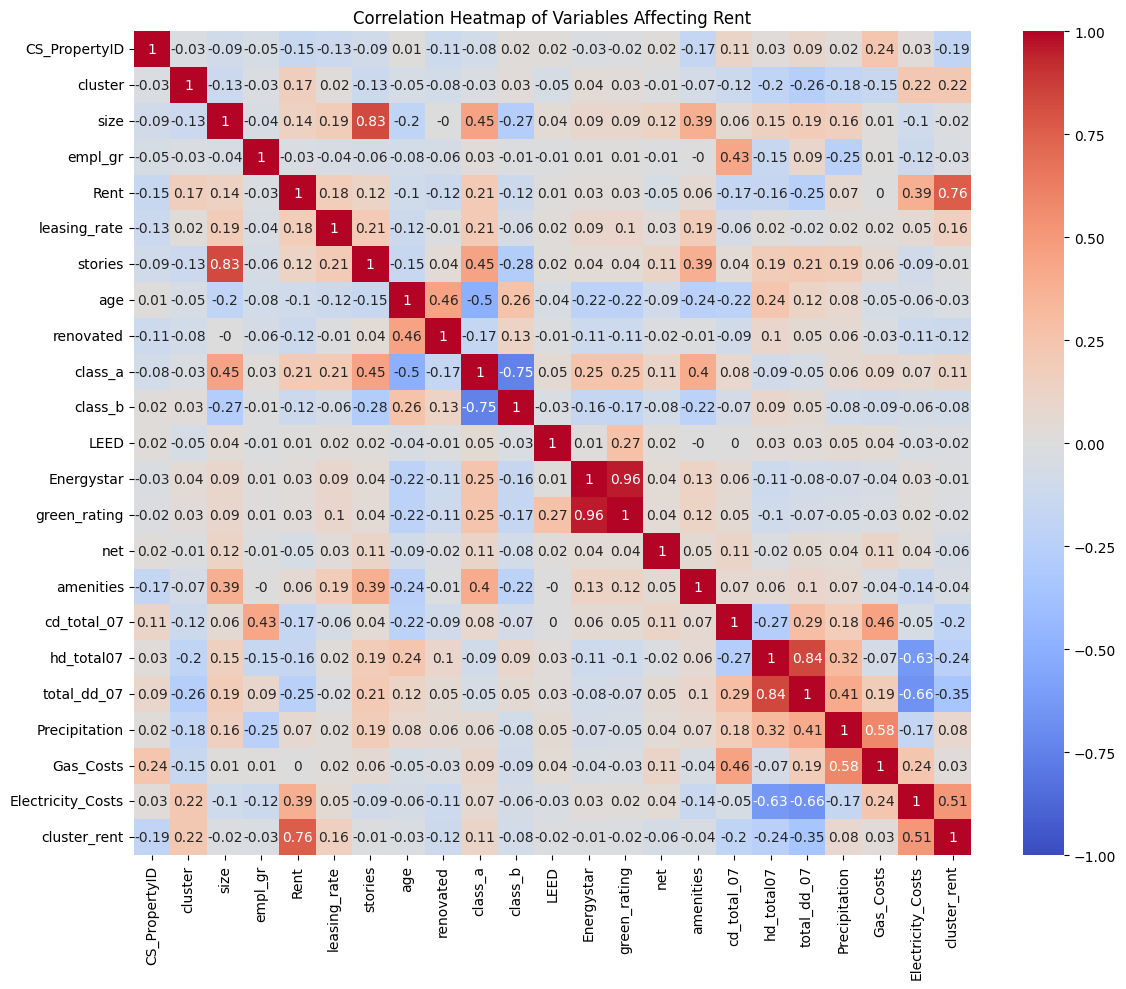

In [13]:
# Check correlation within different variables and against rent
numeric_columns = gb.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = gb[numeric_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(round(corr_matrix,2), annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Variables Affecting Rent')
plt.tight_layout()
plt.show()

# Rent seem to be somewhat correlated with other variables like electricity costs, class, leasing rate, total degree days, etc.
# Moreover the correlation between Rent and Green Rating is ~ 0.03 which doesn't suggest a strong influence of green on rent.
# Hence just understanding if the next project will be profitable, taking median of rents for green and 
# non-green as estimates, without considering other variables that might be contributing to the rent, would be a poor measure and might backfire.

In [14]:
# Since we know a lot of features of the upcoming project, we should focus on buildings with similar attributes for our analysis

### The Reuters corpus

Revisit the Reuters C50 text corpus that we briefly explored in class. Your task is simple: tell an interesting story, anchored in some analytical tools we have learned in this class, using this data. For example:
- you could cluster authors or documents and tell a story about what you find.
- you could look for common factors using PCA.
- you could train a predictive model and assess its accuracy, constructing features for each document that maximize performance.
- you could do anything else that strikes you as interesting with this data.

Describe clearly what question you are trying to answer, what models you are using, how you pre-processed the data, and so forth. Make sure you include at least one really interesting plot (although more than one might be necessary, depending on your question and approach.)

Format your write-up in the following sections, some of which might be quite short:
- Question: What question(s) are you trying to answer? - Approach: What approach/statistical tool did you use to answer the questions? - Results: What evidence/results did your approach provide to answer the questions? (E.g. any numbers, tables, figures as appropriate.) - Conclusion: What are your conclusions about your questions? Provide a written interpretation of your results, understandable to stakeholders who might plausibly take an interest in this data set.

Regarding the data itself: In the C50train directory, you have 50 articles from each of 50 different authors (one author per directory). Then in the C50test directory, you have another 50 articles from each of those same 50 authors (again, one author per directory). This train/test split is obviously intended for building predictive models, but to repeat, you need not do that on this problem. You can tell any story you want using any methods you want. Just make it compelling!

Note: if you try to build a predictive model, you will need to figure out a way to deal with words in the test set that you never saw in the training set. This is a nontrivial aspect of the modeling exercise. (E.g. you might simply ignore those new words.)

This question will be graded according to three criteria:
1. the overall “interesting-ness” of your question and analysis.
2. the clarity of your description. We will be asking ourselves: could your analysis be reproduced by a competent data scientist based on what you’ve said? (That’s good.) Or would that person have to wade into the code in order to understand what, precisely, you’ve done? (That’s bad.)
3. technical correctness (i.e. did you make any mistakes in execution or interpretation?)

# ReutersC50

In [15]:
import os
import sys
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/twinklepanda/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/twinklepanda/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/twinklepanda/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [16]:
# Data fetch from GIT Repo
'''Used 'git clone https://github.com/jgscott/STA380.git' on terminal to fetch the files and stored inside P2CourseGitRepo'''

"Used 'git clone https://github.com/jgscott/STA380.git' on terminal to fetch the files and stored inside P2CourseGitRepo"

In [17]:
directory = "/Users/twinklepanda//Desktop/Me/MSBA/Summer/IntroToML/P2CourseGitRepo/data/ReutersC50"

data = []

for rep in os.listdir(directory):
    for sub_rep in os.listdir(os.path.join(directory,rep)):
        for txt_file in os.listdir(os.path.join(directory,rep,sub_rep)):
            try:
                with open(os.path.join(directory,rep,sub_rep,txt_file), 'r') as file:
                    content = file.read()
                    content = content.replace('\n', ' ')
                    content = ' '.join(content.split())
                
                data.append({
                    'Repository': rep,
                    'Journalist': sub_rep,
                    'TextFile': txt_file,
                    'Article': content})
            except :
                pass

df = pd.DataFrame(data)

df.head()

,Repository,Journalist,TextFile,Article
0,C50test,RobinSidel,347781newsML.txt,ITT Corp. met with financial advisers on Thurs...
1,C50test,RobinSidel,306379newsML.txt,Norfolk Southern Corp. on Monday launched a ne...
2,C50test,RobinSidel,324849newsML.txt,Long-troubled solid waste firm Mid-American Wa...
3,C50test,RobinSidel,284041newsML.txt,Healthcare and oil companies are expected to b...
4,C50test,RobinSidel,363477newsML.txt,The union of CVS Corp and Revco D.S. Inc creat...


### Q1. How do journalists cluster based on their topic preferences?

In [18]:
# Created 1 document per Journalist with all their articles concatenated
journals = df[['Journalist', 'Article']].drop_duplicates()\
                                        .groupby('Journalist')\
                                        .agg(Document = ('Article', ' '.join))\
                                        .reset_index()
journals.iloc[:3]

,Journalist,Document
0,AaronPressman,The U.S. government is scrambling to update th...
1,AlanCrosby,East European markets moved higher across the ...
2,AlexanderSmith,British estate agency and financial products g...


#### Difference between Stemming and Lemmatization
- Stemming: Removes prefixes and suffixes to get the root form of a word
     - "Caring" → "Car" (incorrect root) and "Better" → "Better" (or possibly "Bet")
- Lemmatization: Uses linguistic rules and a dictionary to transform a word into its base form ensuring it remains a valid word
     - "Caring" → "Care" (correct root) and "Better" → "Good" (correct base form)

In [19]:
# Pre-processing: Tokenize, Stop word removal & Lemmatization
stop_words = set(stopwords.words('english'))

lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalnum()]
    tokens = [token for token in tokens if token not in stop_words]
    return ' '.join(tokens)

journals['processed_doc'] = journals['Document'].apply(preprocess_text)

#### Topic Modelling using LDA

In [ ]:
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
doc_term_matrix = vectorizer.fit_transform(journals['processed_doc'])

lda_model = LatentDirichletAllocation(n_components=10, random_state=42)
lda_output = lda_model.fit_transform(doc_term_matrix)

df_topic_distribution = pd.DataFrame(lda_output, columns=[f'Topic_{i+1}' for i in range(10)])
journals = pd.concat([journals, df_topic_distribution], axis=1)

In [ ]:
print(''' 
NOTE: 
Here, we see 10 topics because we chose n_components = 10. 
The values in these topic columns are the probabilities that a given document belongs to each topic. 
These probabilities sum to 1 for each document. 

The first document here we see by Aaron Pressman, most likely belongs to topic 1 since the topic distribution probability is 81%.
He has predominantly focused on Topic 1 in his past work, which suggests a strong interest or expertise in that area. 
It doesn't account for any trends, changes in interests, or external factors that might influence his future work. 
Hence, we cannot conclude that there's a 81% chance of his next article to be about topic 1.

''')

journals.head(2)

In [ ]:
# Cluster the journals based on topic distribution
kmeans = KMeans(n_clusters=5, random_state=42)
journals['Cluster'] = kmeans.fit_predict(df_topic_distribution)

# Perform t-SNE to reduce to 2 dimensions for plotting
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(df_topic_distribution)

df_tsne = pd.DataFrame(data=tsne_results, columns=['tsne1', 'tsne2'])
df_tsne['Cluster'] = journals['Cluster']
df_tsne['Journalist'] = journals['Journalist']

plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_tsne, x='tsne1', y='tsne2', hue='Cluster', style='Cluster', s=100, palette='deep')

for i, txt in enumerate(df_tsne['Journalist']):
    plt.annotate(txt, (df_tsne['tsne1'].iloc[i], df_tsne['tsne2'].iloc[i]), fontsize=8, alpha=0.7)

plt.title('Journalist Clusters based on Topic Preferences')
plt.xlabel('t-SNE dimension 1')
plt.ylabel('t-SNE dimension 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# Get features corresponding to each topic:
feature_names = vectorizer.get_feature_names_out()

def display_topics(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx + 1}:")
        print(", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        print("\n")

n_top_words = 10  # Number of top words you want to see per topic
display_topics(lda_model, feature_names, n_top_words)